stock Prices Prediction Using Long Term Short Memory

# **PART->1.  Data Preprocessing**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [ ]:
dataset_train = pd.read_csv('/content/NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[: , 1:2].values

In [ ]:
dataset_train

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Feature Scailing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled= sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60,2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# **Part->2.  Building the RNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units= 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 16s 136ms/step - loss: 0.0090
Epoch 2/100
62/62 [==============================] - 8s 137ms/step - loss: 0.0029
Epoch 3/100
62/62 [==============================] - 10s 152ms/step - loss: 0.0030
Epoch 4/100
62/62 [==============================] - 10s 170ms/step - loss: 0.0027
Epoch 5/100
62/62 [==============================] - 8s 133ms/step - loss: 0.0027
Epoch 6/100
62/62 [==============================] - 8s 137ms/step - loss: 0.0024
Epoch 7/100
62/62 [==============================] - 13s 206ms/step - loss: 0.0024
Epoch 8/100
62/62 [==============================] - 11s 185ms/step - loss: 0.0023
Epoch 9/100
62/62 [==============================] - 9s 150ms/step - loss: 0.0021
Epoch 10/100
62/62 [==============================] - 8s 122ms/step - loss: 0.0020
Epoch 11/100
62/62 [==============================] - 9s 141ms/step - loss: 0.0021
Epoch 12/100
62/62 [==============================] - 9s 142ms/step - loss: 0.0018
Epoch 13

Part->3.  Making the prdiction and visualising the results

In [ ]:
dataset_test = pd.read_csv('/content/NSE-TATAGLOBAL.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)

inputs = dataset_total[len(dataset_total)- len(dataset_test) - 60:].values
inputs  = inputs.reshape(-1,1)
inputes = sc.transform(inputs)
X_test = []
for i in range(60,76):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


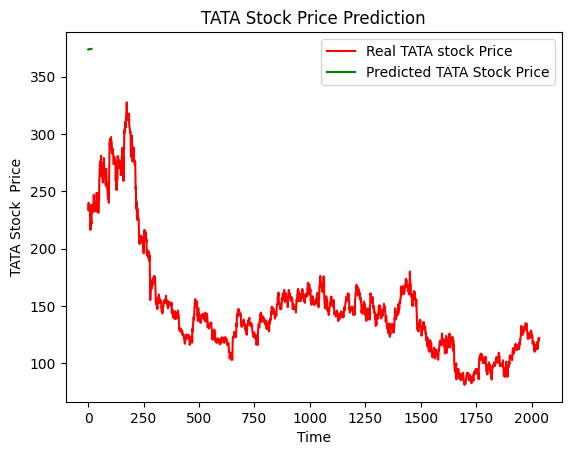

In [ ]:
plt.plot(real_stock_price, color= 'red' , label = 'Real TATA stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock  Price')
plt.legend()
plt.show()

# ***THE END***